**Classifying movie reviews: a binary classification example**

#Load the dataset

In [34]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [35]:
train_data.shape

(25000,)

In [36]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [37]:
train_labels.shape

(25000,)

In [38]:
train_labels[0]

1

In [39]:
max([max(sequence) for sequence in train_data])

9999

In [40]:
# Decode reviews back to text
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decode_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)
print(decode_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Note: "0" - Padding. "1" - Start of sequence. "2" - Unknown.

#Prepare the data

**Encoding the integer sequence via multi-hot encoding**

In [41]:
# Prepare inputs

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [42]:
# Prepare outputs
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
#y_train = train_labels.copy()
#y_test = test_labels.copy()

#Build the model

**Define the model**

In [43]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [layers.Dense(16, activation="relu"),
     layers.Dropout(0.5),
     layers.Dense(16, activation="relu"),
     layers.Dropout(0.5),
     layers.Dense(1, activation="sigmoid")
    ]
)

**Compile the model**

In [44]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

#Validate the model

**Fit the model with a validation set**

In [45]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [46]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
      monitor="val_accuracy",
      patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
      filepath="checkpoint_path.keras",
      monitor="val_loss",
      save_best_only=True,
    )
]


In [47]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
    callbacks=callbacks_list
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.5764 - loss: 0.6690 - val_accuracy: 0.7978 - val_loss: 0.5326
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7380 - loss: 0.5418 - val_accuracy: 0.8547 - val_loss: 0.4397
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8207 - loss: 0.4521 - val_accuracy: 0.8766 - val_loss: 0.3799
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8617 - loss: 0.3945 - val_accuracy: 0.8814 - val_loss: 0.3334
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8838 - loss: 0.3403 - val_accuracy: 0.8870 - val_loss: 0.3100
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9067 - loss: 0.2914 - val_accuracy: 0.8887 - val_loss: 0.2867
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9164 - loss: 0.2521 - val_accuracy: 0.8877 - val_loss: 0.3045
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9331 - loss: 0.2211 - val_accuracy: 0.8903 - 

**Plot the training and validation loss**

In [48]:
import matplotlib.pyplot as plt

def plot_training_validation_results(training_results, validation_results,
                                     title, ylabel):
  print("training: ", training_results)
  print("validation: ", validation_results)
  plt.clf()
  epochs = range(1, len(training_results)+1)
  plt.plot(epochs, training_results, "bo", label="Training")
  plt.plot(epochs, validation_results, "b", label="Validation")
  plt.xlabel("Epochs")
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

training:  [0.6383946537971497, 0.5214210748672485, 0.4435802102088928, 0.37780046463012695, 0.3326306641101837, 0.2865946292877197, 0.2509858012199402, 0.22020383179187775, 0.19603699445724487, 0.17271669209003448]
validation:  [0.5325620174407959, 0.4397065043449402, 0.379850834608078, 0.3333841860294342, 0.3100021183490753, 0.2867327034473419, 0.30446842312812805, 0.29312533140182495, 0.3097202777862549, 0.3521694839000702]


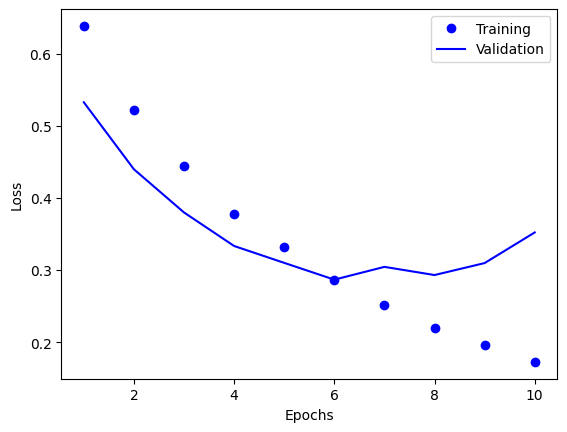

In [49]:
history_dict = history.history
training_loss_values = history_dict["loss"]
validation_loss_values = history_dict["val_loss"]
plot_training_validation_results(training_loss_values, validation_loss_values,
                                 "Training and validation loss", "Loss")

training:  [0.6227333545684814, 0.7585333585739136, 0.8281999826431274, 0.8685333132743835, 0.8875333070755005, 0.9077333211898804, 0.9199333190917969, 0.9326000213623047, 0.9402666687965393, 0.9471333622932434]
validation:  [0.7978000044822693, 0.8547000288963318, 0.8766000270843506, 0.8813999891281128, 0.8870000243186951, 0.888700008392334, 0.8877000212669373, 0.8902999758720398, 0.886900007724762, 0.8848000168800354]


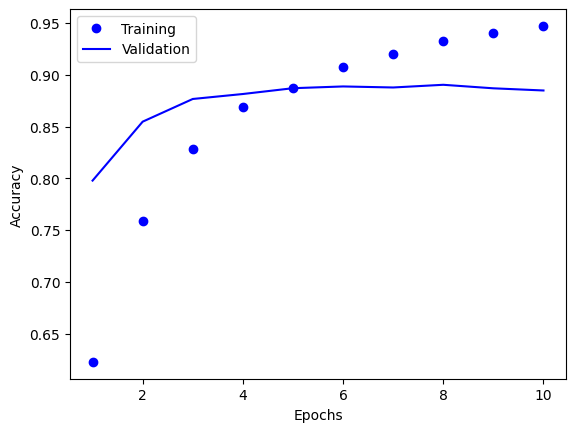

In [50]:
training_acc = history_dict["accuracy"]
validation_acc = history_dict["val_accuracy"]
plot_training_validation_results(training_acc, validation_acc,
                                 "Training and validation accuracy",
                                 "Accuracy")

**Refine the model**

In [51]:
# model = keras.Sequential(
#     [layers.Dense(16, activation="relu"),
#      layers.Dense(16, activation="relu"),
#      layers.Dense(1, activation="sigmoid")
#     ]
# )

# model.compile(
#     optimizer="rmsprop",
#     loss="binary_crossentropy",
#     metrics=["accuracy"]
# )

# model.fit(
#     x_train,
#     y_train,
#     epochs=4,
#     batch_size=512,
#     callbacks=callbacks_list
# )


#Predict new data

In [52]:
model = keras.models.load_model("checkpoint_path.keras")

In [53]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.2393442 ],
       [0.96950185],
       [0.7898342 ],
       ...,
       [0.02879243],
       [0.06505916],
       [0.44080603]], dtype=float32)

In [54]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8801 - loss: 0.2992
[0.3001307547092438, 0.8829200267791748]
